In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   alpha_1[0]     -1.26      0.42     -1.29     -1.82     -0.50    143.09      1.01
   alpha_2[0]     -2.33      0.25     -2.32     -2.74     -1.93    140.07      1.00
    beta_1[0]      1.56      0.69      1.47      0.55      2.60    219.69      1.00
    beta_2[0]      1.85      0.61      1.84      0.94      2.90    294.94      1.00
     kappa[0]      0.89      1.37      0.92     -1.68      2.64    288.04      1.00
   m_break[0]      8.23      1.70      8.77      5.72     10.00     83.60      1.00
  mix_tilt[0]      0.61      0.25      0.60      0.28      0.99    310.53      1.00
   mixture[0]      0.60      0.13      0.63      0.43      0.80    107.30      1.00
    mu_chi[0]      0.20      0.11      0.19      0.05      0.40    522.80      1.00
   mu_peak[0]     32.13      1.43     32.27     29.94     34.59    230.14      1.00
   sig_chi[0]      0.61      0.25      0.59      0.28      1.00    130.16  

(array([ 2.,  4., 14.,  9., 10., 15., 22., 31., 29., 27., 32., 27., 19.,
        31.,  7.,  8.,  4.,  2.,  4.,  3.]),
 array([-2.46901802, -2.11405613, -1.75909425, -1.40413236, -1.04917047,
        -0.69420859, -0.3392467 ,  0.01571519,  0.37067707,  0.72563896,
         1.08060085,  1.43556273,  1.79052462,  2.1454865 ,  2.50044839,
         2.85541028,  3.21037216,  3.56533405,  3.92029594,  4.27525782,
         4.63021971]),
 <BarContainer object of 20 artists>)

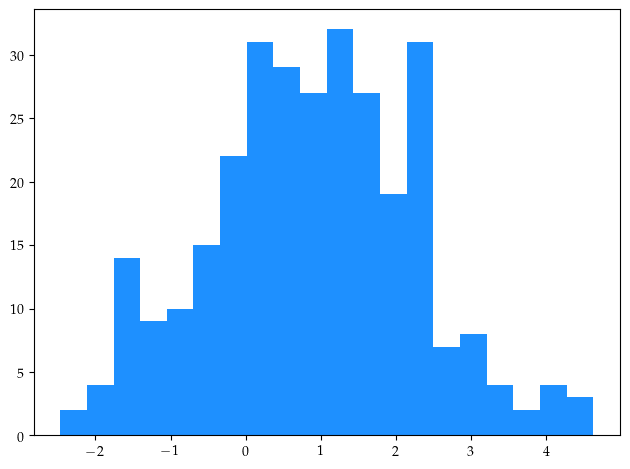

In [5]:
plt.hist(posterior_samples["kappa"], bins=20)

In [ ]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")